## Behavioral Risk Factors - Vision and Eye Health Surveillance
[Data Source](https://chronicdata.cdc.gov/Vision-Eye-Health/Behavioral-Risk-Factors-Vision-and-Eye-Health-Surv/vkwg-yswv)

### Loading and Understanding Data

The data I will be exploring is a de-identified dataset provided by the CDC that gives the prevalence of people who are blind or who still have difficulty seeing even when wearing glasses on the basis of certain characteristics for the years 2013-2018. For the rest of the analysis, I will denote this as being "blind/near-blind" for the sake of brevity. Each row in this dataset is a different stratum-specific measurement of prevalence, where the strata are age, gender, race/ethnicity, and risk factor (diabetes, smoking).

I would like to see if there are any trends in the data relating to the characteristics listed above, as well as if there are any trends over time.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [69]:
brf = pd.read_csv("brf_vision_eye.csv")
brf.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Category,Question,Response,Age,...,CategoryID,QuestionID,ResponseID,DataValueTypeID,AgeID,GenderID,RaceEthnicityID,RiskFactorID,RiskFactorResponseID,Geolocation
0,2013,2013,US,National,BRFSS,Visual Function,Blind or Difficulty Seeing,Percentage of people who are blind or have ser...,Yes,All ages,...,CBLIND,BRVPGL,RYES,NaN,AGEALL,GF,ALLRACE,RFDM,RFNO,NaN
1,2016,2016,US,National,BRFSS,Visual Function,Blind or Difficulty Seeing,Percentage of people who are blind or have ser...,Yes,All ages,...,CBLIND,BRVPGL,RYES,NaN,AGEALL,GF,ALLRACE,RFSM,RFNO,NaN
2,2017,2017,US,National,BRFSS,Visual Function,Blind or Difficulty Seeing,Percentage of people who are blind or have ser...,Yes,All ages,...,CBLIND,BRVPGL,RYES,NaN,AGEALL,GF,ALLRACE,RFSM,RFYES,NaN
3,2018,2018,US,National,BRFSS,Visual Function,Blind or Difficulty Seeing,Percentage of people who are blind or have ser...,Yes,All ages,...,CBLIND,BRVPGL,RYES,NaN,AGEALL,GALL,OTH,RFDM,RFYES,NaN
4,2018,2018,US,National,BRFSS,Visual Function,Blind or Difficulty Seeing,Percentage of people who are blind or have ser...,Yes,All ages,...,CBLIND,BRVPGL,RYES,NaN,AGEALL,GALL,ASN,RFSM,RFYES,NaN


In [8]:
brf.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Category', 'Question', 'Response', 'Age', 'Gender',
       'RaceEthnicity', 'RiskFactor', 'RiskFactorResponse', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Numerator', 'Sample_Size', 'LocationID', 'TopicID', 'CategoryID',
       'QuestionID', 'ResponseID', 'DataValueTypeID', 'AgeID', 'GenderID',
       'RaceEthnicityID', 'RiskFactorID', 'RiskFactorResponseID',
       'Geolocation'],
      dtype='object')

In [128]:
# See the unique values for each characteristic
[brf["LocationAbbr"].unique(), brf["Age"].unique(), brf["Gender"].unique(), brf["RaceEthnicity"].unique(), brf["RiskFactor"].unique(),
    brf["Data_Value_Type"].unique()]

[array(['US', 'NM', 'HI', 'AK', 'ND', 'WI', 'MI', 'OK', 'AR', 'TN', 'MO',
        'IL', 'MT', 'CT', 'RI', 'KY', 'TX', 'NV', 'PR', 'PA', 'NJ', 'SC',
        'MD', 'AL', 'AZ', 'MA', 'NH', 'MN', 'GU', 'UT', 'DC', 'LA', 'FL',
        'DE', 'SD', 'CA', 'VT', 'NC', 'ME', 'WA', 'IN', 'GA', 'KS', 'OR',
        'VA', 'IA', 'CO', 'NY', 'WV', 'MS', 'ID', 'WY', 'OH', 'NE'],
       dtype=object),
 array(['All ages', '40-64 years', '18-39 years', '65 years and older'],
       dtype=object),
 array(['Female', 'All genders', 'Male'], dtype=object),
 array(['All races', 'Other', 'Asian', 'Black, non-Hispanic',
        'North American Native', 'White, non-Hispanic',
        'Hispanic, any race'], dtype=object),
 array(['Diabetes', 'Smoking', 'All participants'], dtype=object),
 array(['Crude Prevalence', 'Age-adjusted Prevalence'], dtype=object)]

**Dataset Organization** 

- We can see above that the data covers all 50 states, as well as the District of Columbia, Puerto Rico, Guam, and the United States a whole. 

- The age groups are 18-39, 40-64, 65+, and all ages. 

- For gender there are female, male, and both combined. 

- The race/ethnicity groups are asian, black non-hispanic, hispanic any race, north american native, white non-hispanic, other, and all races combined.

- The risk factors are diabetes, smoking, and all participants (not taking risk factor into account).

- We also see that the dataset includes both crude and age-adjusted prevalence rates.

### Exploratory Data Analysis

Although the dataset includes information about all states and other locations, I want to first look at Louisiana residents (since that's my home state). For the rest of the analysis, when making comparisons, I will only use the age-adjusted prevalence rates to account for different age structures within different 
characteristics.

Next, I will drop all redundant and unnecessary columns to make the dataset cleaner. 

In [131]:
# Only keeping columns needed
brf_small = brf[['YearStart', 'YearEnd', 'LocationAbbr','Age', 'Gender', 'RaceEthnicity', 'RiskFactor', 'RiskFactorResponse', 
                    'Data_Value_Type', 'Data_Value']]
brf_small.head()

,YearStart,YearEnd,LocationAbbr,Age,Gender,RaceEthnicity,RiskFactor,RiskFactorResponse,Data_Value_Type,Data_Value
0,2013,2013,US,All ages,Female,All races,Diabetes,No,Crude Prevalence,4.59
1,2016,2016,US,All ages,Female,All races,Smoking,No,Age-adjusted Prevalence,4.23
2,2017,2017,US,All ages,Female,All races,Smoking,Yes,Age-adjusted Prevalence,9.42
3,2018,2018,US,All ages,All genders,Other,Diabetes,Yes,Age-adjusted Prevalence,11.70
4,2018,2018,US,All ages,All genders,Asian,Smoking,Yes,Age-adjusted Prevalence,NaN


First, I will look at gender differences.

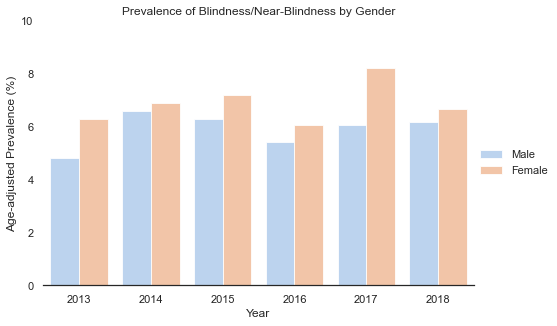

In [167]:
brf_la_gender = brf_small[(brf_small["LocationAbbr"] == "LA") & (brf_small["Gender"] != "All genders") & 
        (brf_small["Data_Value_Type"] == "Age-adjusted Prevalence")]

sns.set_theme(style="white", palette="pastel")
g = sns.catplot(data=brf_la_gender, kind="bar",
                x="YearStart", y="Data_Value", hue="Gender",
                alpha=0.8, height=4.5, aspect=1.5)
g.despine(left=True)
g.set_axis_labels("Year", "Age-adjusted Prevalence (%)")
g.legend.set_title("")
g.set(title="Prevalence of Blindness/Near-Blindness by Gender", ylim=(0,10))

For each year, women have a higher age-adjusted prevalence of blindness, and in 2017 there was a notable difference.

What about race/ethnicity?

In [104]:
brf_la_race = brf_small[(brf_small["LocationAbbr"] == "LA") & (brf_small["RaceEthnicity"] != "All races") & 
                        (brf_small["Data_Value_Type"] == "Age-adjusted Prevalence")]

brf_la_race.dropna()

,YearStart,YearEnd,LocationAbbr,Age,Gender,RaceEthnicity,RiskFactor,RiskFactorResponse,Data_Value_Type,Data_Value
1070,2013,2013,LA,All ages,All genders,"White, non-Hispanic",All participants,All participants,Age-adjusted Prevalence,4.55
2317,2018,2018,LA,All ages,All genders,"White, non-Hispanic",All participants,All participants,Age-adjusted Prevalence,4.80
2505,2015,2015,LA,All ages,All genders,"White, non-Hispanic",All participants,All participants,Age-adjusted Prevalence,6.24
2982,2013,2013,LA,All ages,All genders,"Black, non-Hispanic",All participants,All participants,Age-adjusted Prevalence,7.84
3341,2014,2014,LA,All ages,All genders,"Black, non-Hispanic",All participants,All participants,Age-adjusted Prevalence,9.65
5624,2016,2016,LA,All ages,All genders,"Black, non-Hispanic",All participants,All participants,Age-adjusted Prevalence,8.15
6137,2014,2014,LA,All ages,All genders,North American Native,All participants,All participants,Age-adjusted Prevalence,14.70
6864,2014,2014,LA,All ages,All genders,"White, non-Hispanic",All participants,All participants,Age-adjusted Prevalence,5.69
8273,2016,2016,LA,All ages,All genders,"White, non-Hispanic",All participants,All participants,Age-adjusted Prevalence,4.69
8352,2017,2017,LA,All ages,All genders,"White, non-Hispanic",All participants,All participants,Age-adjusted Prevalence,5.58


Since there are only two rows where the Race/Ethnicity is not black or white and is not missing, I will only look at black non-hispanic and white non-hispanic for comparisons.

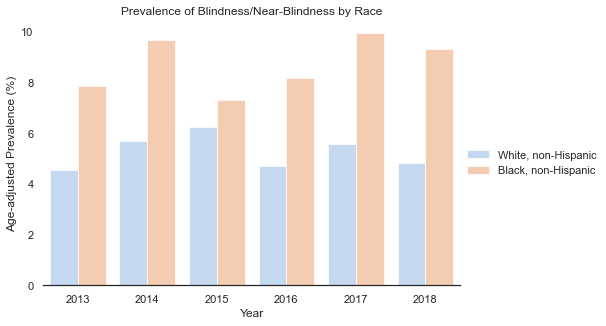

In [168]:
brf_la_race = brf_la_race.dropna()
brf_la_race_bw = brf_la_race[brf_la_race["RaceEthnicity"].isin(["Black, non-Hispanic","White, non-Hispanic"])]
g = sns.catplot(data=brf_la_race_bw, kind="bar",
                x="YearStart", y="Data_Value", hue="RaceEthnicity",
                alpha=0.7, height=4.5, aspect=1.5)
g.despine(left=True)
g.set_axis_labels("Year", "Age-adjusted Prevalence (%)" )
g.legend.set_title("")
g.set(title="Prevalence of Blindness/Near-Blindness by Race")

In [114]:
brf_la_race_bw.groupby(["YearStart"])["Data_Value"].max() / brf_la_race_bw.groupby(["YearStart"])["Data_Value"].min()

YearStart
2013    1.723077
2014    1.695958
2015    1.173077
2016    1.737740
2017    1.779570
2018    1.939583
Name: Data_Value, dtype: float64

Blacks, non-hispanic, have signicantly higher prevalence for blindness/near-blindness than whites, non-hispanic. Above, you can see the prevalence ratio of blacks to whites. 2018 has the highest prevalence ratio, with blacks having 1.9 times the prevalence of blindness/near-blindness than whites.

Now, I want to plot the prevalance rates by different age groups. I suspect that the prevalecne rates will increase as age increases.

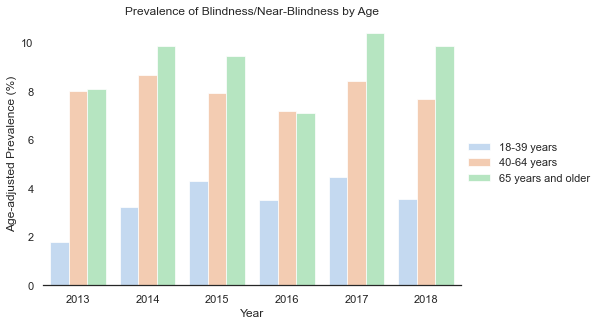

In [169]:
brf_la_age = brf_small[(brf_small["LocationAbbr"] == "LA") & (brf_small["Age"] != "All ages") & 
                            (brf_small["Data_Value_Type"] == "Age-adjusted Prevalence")]

g = sns.catplot(data=brf_la_age, kind="bar",
                x="YearStart", y="Data_Value", hue="Age",
                alpha=0.7, height=4.5, aspect=1.5)
g.despine(left=True)
g.set_axis_labels("Year", "Age-adjusted Prevalence (%)" )
g.legend.set_title("")
g.set(title="Prevalence of Blindness/Near-Blindness by Age")

As suspected, those 40+ years of age have much higher prevalecne rates than those under 40.

Finally, for Lousiana residents, I want to look at prevalence rates by risk factor of either smoking or having diabetes.

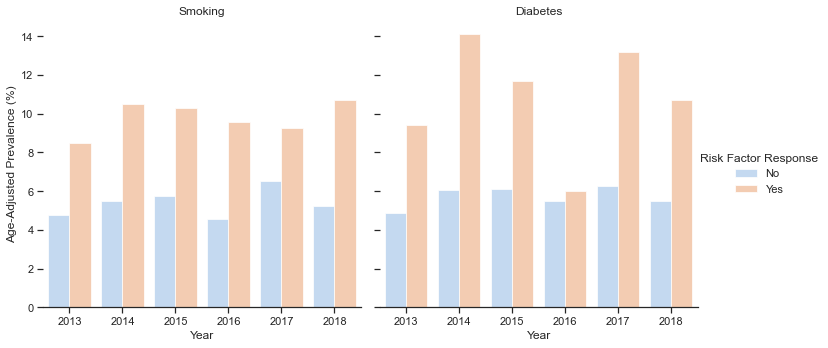

In [183]:
brf_la_risk = brf_small[(brf_small["LocationAbbr"] == "LA") & (brf_small["RiskFactorResponse"] != "All participants") & 
                            (brf_small["Data_Value_Type"] == "Age-adjusted Prevalence")]

sns.set_style("ticks")
g = sns.catplot(data=brf_la_risk, x="YearStart", y="Data_Value", col="RiskFactor", hue="RiskFactorResponse",
                    kind="bar", ci=None, alpha=0.7)
g.set_axis_labels("Year","Age-Adjusted Prevalence (%)")
g.set_xticklabels(["2013", "2014","2015","2016","2017","2018"])
g.set_titles("{col_name}")
g.despine(left=True)
g.legend.set_title("Risk Factor Response")


Both smoking and diabetes have an increased prevalence of blindness/near-blindness when compared to not having that risk factor, and those with diabetes have higher prevalence rates than those who smoke. 

**Now, how does the state of Louisiana compare to the US as a whole?**

There were some interesting trends in the data when looking at Louisiana residents, and now I want to see how the rates for Louisianians compare to the United States as a whole for gender, race/ethnicity, and risk factor. 

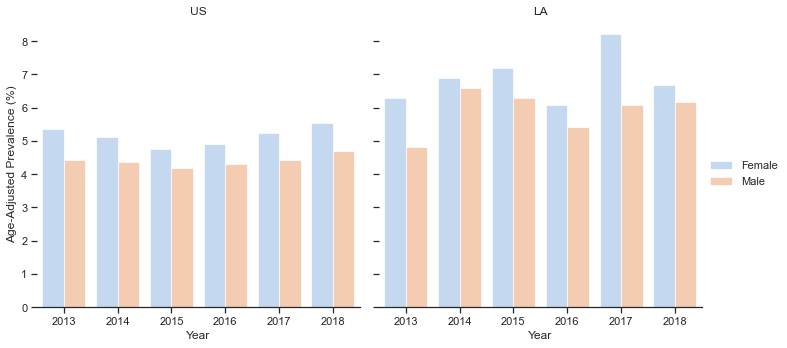

In [182]:
brf_gender = brf_small[(brf_small["LocationAbbr"].isin(["US","LA"])) & (brf_small["Age"] == "All ages") & (brf_small["Gender"] != "All genders") & 
                        (brf_small["RaceEthnicity"] == "All races") & (brf_small["RiskFactor"] == "All participants") &
                        (brf_small["Data_Value_Type"] == "Age-adjusted Prevalence")]

g = sns.catplot(data=brf_gender, x="YearStart", y="Data_Value", col="LocationAbbr", hue="Gender",
                    kind="bar", ci=None, alpha=0.7)
g.set_axis_labels("Year","Age-Adjusted Prevalence (%)")
g.set_xticklabels(["2013", "2014","2015","2016","2017","2018"])
g.set_titles("{col_name}")
g.despine(left=True)
g.legend.set_title("")

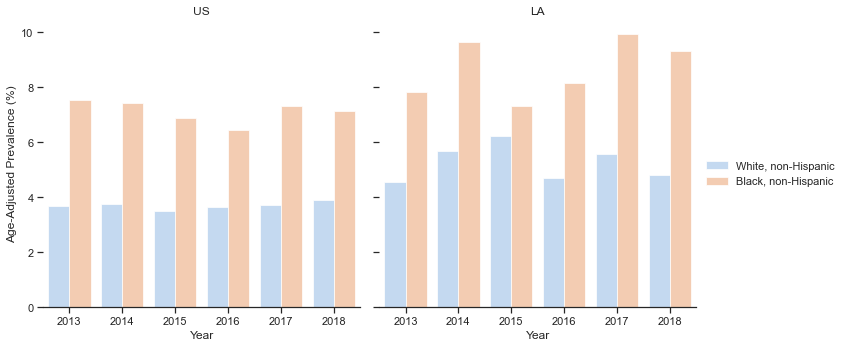

In [181]:
brf_race = brf_small[(brf_small["LocationAbbr"].isin(["US","LA"])) & (brf_small["Age"] == "All ages") & (brf_small["Gender"] == "All genders") & 
                        (brf_small["RaceEthnicity"].isin(["Black, non-Hispanic","White, non-Hispanic"])) & (brf_small["RiskFactor"] == "All participants") &
                        (brf_small["Data_Value_Type"] == "Age-adjusted Prevalence")]

g = sns.catplot(data=brf_race, x="YearStart", y="Data_Value", col="LocationAbbr", hue="RaceEthnicity",
                    kind="bar", ci=None, alpha=0.7)
g.set_axis_labels("Year","Age-Adjusted Prevalence (%)")
g.set_xticklabels(["2013", "2014","2015","2016","2017","2018"])
g.set_titles("{col_name}")
g.despine(left=True)
g.legend.set_title("")

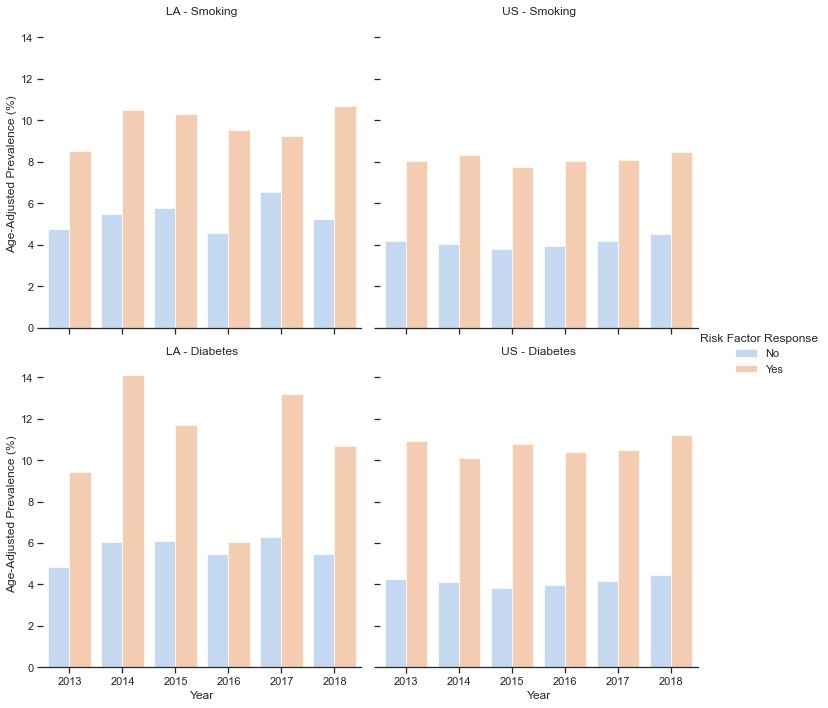

In [192]:
brf_risk = brf_small[(brf_small["LocationAbbr"].isin(["US","LA"])) & (brf_small["Age"] == "All ages") & (brf_small["Gender"] == "All genders") & 
                        (brf_small["RaceEthnicity"] == "All races") & (brf_small["RiskFactor"] != "All participants") &
                        (brf_small["Data_Value_Type"] == "Age-adjusted Prevalence")]

g = sns.catplot(data=brf_risk, x="YearStart", y="Data_Value", col="LocationAbbr", 
                    row="RiskFactor", hue="RiskFactorResponse",
                    kind="bar", ci=None, alpha=0.7)
g.set_axis_labels("Year","Age-Adjusted Prevalence (%)")
g.set_xticklabels(["2013", "2014","2015","2016","2017","2018"])
g.set_titles("{col_name} - {row_name}")
g.despine(left=True)
g.legend.set_title("Risk Factor Response")

For every stratum (gender, race, risk factor), Louisiana has higher prevalence rates of blindness/near-blindness than the US as a whole. 

### Summary
I was interested in seeing how the prevalence of blind/near-blind people in Louisiana might differ based on age, gender, race/ethnicity, and risk factor of smoking and diabetes. As expected, those older have more cases of blindness/near-blindness. Somewhat unexpected, women seem to have slightly higher prevalence rates of blindness than men. Non-hispanic blacks have higher prevalence rates than non-hispanic whites, and the difference is much more pronounced than the differences between gender. Similarly, being a smoker or having diabetes have much higher prevalence rates than not having those risk factors. 

When compared to the US, Louisiana has higher prevalence rates of blindness/near-blindness, even when looking at stratum-specific measurements. Why is this the case? I'm not sure, but this may be due to Louisiana having a lower average socioeconomic status than other US states. Since socioeconomic status is correlated with access to healthcare, having more cases of blindness/near-blindness may be a result of that as some cases could have been prevented/treated with better access to healthcare.

There are more questions that I can explore in the data, such as:

- Are there any trends over time?
- In the US, are there any trends in the intersection of race/ethnicity and gender, or race/ethnicity and risk factor?
- How do all the US states compare to the US as a whole? Which have higher prevalence rates? Which have lower?

I enjoyed playing with this dataset, and I hope I can further explore it in the future!
